In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import matplotlib
import analysis_pca
import generate_linear_model

Ts = 1000
data_path = r'C:\Users\IBS\Desktop\python_code_N2'
save_path = r'C:\Users\IBS\Desktop\figures'

In [2]:
#For FN data PCA

import pre_processing

ppss = pre_processing.pre_processing(Ts, data_path, save_path)
[final_cat, data_cat, val_cat, dur_cat, rejectedXY_cat] = ppss.datasorting_orientation(1)
apca = analysis_pca.analysis_pca(Ts, data_cat, save_path)
data_cat_sm = apca.smoothing_data()  # Smoothed data

In [3]:
peak = []
for a in range(np.shape(val_cat)[0]):
    M = []
    for ori in range(8):
        temp = val_cat[a][ori]
        M.append(np.max(temp,axis = 1))
        # peak[a][ori]  = np.max(temp,axis = 1)
    peak.append(M)

peak = np.array(peak, dtype = object)

In [4]:
final = []
for ori_num in range(8):
    finalp=[]
    for a in range(np.shape(data_cat)[0]):
        temp_data = data_cat[a][ori_num]
        pram = np.array([peak[a][ori_num], dur_cat[a][ori_num]])
        pram2= np.mean(pram, axis = 1)
        
        linmod = generate_linear_model.generate_linear_model(temp_data, pram, pram2);
        finalp.append(linmod)
    final.append(finalp)

In [31]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from matplotlib import gridspec
from filter_matrix import filter_matrix

cutting = 50  # cut the start and end part of data, this is data point
plot_data = {}
plot_data_cut = {}
for ori_num in range(8):
    
    pp1, pp2, pp3, pp4, pp5 = [], [], [], [], []
    for a in range(np.shape(final)[1]):
        temp = final[ori_num][a]
        pp1.append(temp['wv0'])
        pp2.append(temp['wv'])
        pp3.append(temp['wr'])
        pp4.append(temp['ssc'])
        pp5.append(temp['ssc0'])

    # Stack and smooth
    zpp1 = filter_matrix(np.array(pp1), sigma=2)
    zpp2 = filter_matrix(np.array(pp2), sigma=2)
    zpp3 = filter_matrix(np.array(pp3), sigma=2)
    zpp4 = filter_matrix(np.array(pp4), sigma=2)
    zpp5 = filter_matrix(np.array(pp5), sigma=2)

    plot_data[ori_num] = [zpp1, zpp2, zpp3, zpp4, zpp5]
    
    plot_data_cut[ori_num] = [zpp1[:,cutting:zpp1[1].shape[0]-cutting],
                          zpp2[:,cutting:zpp2[1].shape[0]-cutting],
                          zpp3[:,cutting:zpp3[1].shape[0]-cutting],
                          zpp4[:,cutting:zpp4[1].shape[0]-cutting],
                          zpp5[:,cutting:zpp5[1].shape[0]-cutting]]

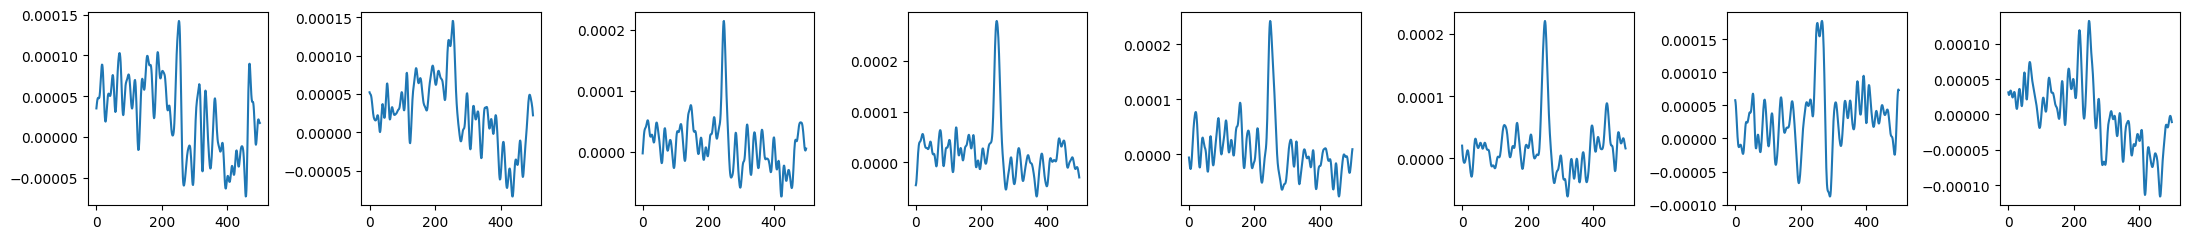

In [24]:
# Plotting for each
# for b in range(5):
# up ur r dr down dl l ul -> right ur u ul left dl d dr [2, 1, 0, 7, 6, 5, 4, 3]
b = 0
fig = plt.figure(figsize=(22, 2.5))
gs = gridspec.GridSpec(1, 8)
time = np.arange(-300, 300)
# for a in range(8):
c = 0
# for a in [2, 1, 0, 7, 6, 5, 4, 3]:
for a in range(8):
    ax = fig.add_subplot(gs[0, c])
    # ax.imshow(plot_data_cut[a][b], aspect='auto', cmap='jet', interpolation='none', extent=[-300, 300, 67, 0])
    ax.plot(np.mean(plot_data_cut[a][b],axis=0))
    # ax.set(xticks=np.linspace(-300, 300, 10), xticklabels=np.arange(-300, 300, 100))
    # ax.set_xticklabels([-300, 300])
    # ax.set_xlim([-300, 300])
    c = c + 1
plt.tight_layout()

# plt.savefig('linear_model.jpg', dpi=300)
plt.show()

# extent=[0, 120, 10, 0]);
# ax.set(xticks=np.linspace(-300, 300, 10), xticklabels=np.arange(-300, 300, 100), yticks=[0, 10], yticklabels=[0, 1]);

In [53]:
# calculate signal/noise ratio

signal_to_noise_total = []
for a in range(8):

    temp = plot_data[a]
    baseline = np.transpose(temp, [2,0,1])[300:]
    signal = np.transpose(temp, [2,0,1])[:300]
    max_base = np.max(baseline, axis=0)
    max_signal = np.max(signal, axis=0)
    signal_to_noise = max_signal / max_base
    signal_to_noise_total.append(signal_to_noise)

signal_to_noise_total = np.array(signal_to_noise_total)
signal_to_noise_total = np.transpose(signal_to_noise_total, [1,0,2])

In [54]:
signal_to_noise_total

array([[[0.59692604, 0.31886975, 4.94281926, ..., 0.67122277,
         1.59246451, 0.37247811],
        [0.24597841, 0.88972864, 5.98584535, ..., 1.20165224,
         0.74567404, 2.78684083],
        [0.89098046, 0.74801571, 1.75897904, ..., 1.23508202,
         2.20741589, 0.84330887],
        ...,
        [0.58399099, 0.38208356, 0.94289534, ..., 0.70398544,
         1.20217522, 1.04940234],
        [0.45413273, 0.2638774 , 0.75388121, ..., 0.66492578,
         4.07632681, 0.40969348],
        [0.19481935, 0.30725724, 0.6671678 , ..., 0.25993838,
         0.95895023, 1.0066374 ]],

       [[1.69843966, 0.03633018, 1.44657606, ..., 0.49566643,
         0.90557312, 0.66658866],
        [0.0666909 , 0.75252983, 5.55138651, ..., 1.40239815,
         0.92102858, 1.08195445],
        [1.28911491, 0.37901323, 1.95879611, ..., 0.95142342,
         1.73340164, 1.17446927],
        ...,
        [2.77810032, 0.80417814, 0.89910093, ..., 0.53189349,
         1.1522755 , 1.02482998],
        [1.6